# Naive Bayes

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df = pd.DataFrame(data, columns= ['Species'])

In [5]:
map = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
data.replace({'Species' : map},inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [7]:
X = data.iloc[:, [2, 4]].values
y = data['Species'].values

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [9]:
X

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2],
       [3.9, 0.4],
       [3.4, 0.3],
       [3.4, 0.2],
       [2.9, 0.2],
       [3.1, 0.1],
       [3.7, 0.2],
       [3.4, 0.2],
       [3. , 0.1],
       [3. , 0.1],
       [4. , 0.2],
       [4.4, 0.4],
       [3.9, 0.4],
       [3.5, 0.3],
       [3.8, 0.3],
       [3.8, 0.3],
       [3.4, 0.2],
       [3.7, 0.4],
       [3.6, 0.2],
       [3.3, 0.5],
       [3.4, 0.2],
       [3. , 0.2],
       [3.4, 0.4],
       [3.5, 0.2],
       [3.4, 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.4, 0.4],
       [4.1, 0.1],
       [4.2, 0.2],
       [3.1, 0.1],
       [3.2, 0.2],
       [3.5, 0.2],
       [3.1, 0.1],
       [3. , 0.2],
       [3.4, 0.2],
       [3.5, 0.3],
       [2.3, 0.3],
       [3.2, 0.2],
       [3.5, 0.6],
       [3.8, 0.4],
       [3. , 0.3],
       [3.8, 0.2],
       [3.2, 0.2],
       [3.7, 0.2],
       [3.3, 0.2],
       [3.2, 1.4],
       [3.2, 1.5],
       [3.1,

# Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
X_train

array([[3. , 1.5],
       [2.6, 1.2],
       [3. , 2.1],
       [3.2, 0.2],
       [3.1, 2.3],
       [3.5, 0.6],
       [3.7, 0.2],
       [2. , 1. ],
       [3. , 1.8],
       [3.3, 2.5],
       [2.2, 1.5],
       [2.5, 1.8],
       [2.5, 1.1],
       [3. , 2.3],
       [3.3, 1.6],
       [2.4, 1.1],
       [2.7, 1.8],
       [2.8, 1.5],
       [2.5, 1.7],
       [2.5, 1.9],
       [3.2, 1.4],
       [3. , 2. ],
       [3.4, 1.6],
       [3.1, 0.2],
       [2.7, 1.9],
       [2.7, 1.3],
       [2.9, 1.3],
       [2.5, 1.3],
       [3. , 1.4],
       [3.2, 1.8],
       [3.7, 0.2],
       [3. , 0.1],
       [2.7, 1.9],
       [3. , 1.2],
       [3.4, 0.2],
       [4.4, 0.4],
       [3.1, 1.5],
       [3.1, 0.2],
       [3. , 1.8],
       [2.5, 1.1],
       [3.4, 0.3],
       [2.2, 1.5],
       [3.6, 2.5],
       [2.9, 1.3],
       [3. , 0.1],
       [3. , 2.1],
       [3.2, 2.3],
       [3. , 2.2],
       [2.8, 2.1],
       [3.8, 0.2],
       [3.4, 0.2],
       [3.2, 2. ],
       [3.3,

In [12]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1], dtype=int64)

# Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[-0.11925475,  0.35638175],
       [-1.04039491, -0.02864805],
       [-0.11925475,  1.12644135],
       [ 0.34131533, -1.31208072],
       [ 0.11103029,  1.38312788],
       [ 1.03217045, -0.79870765],
       [ 1.49274053, -1.31208072],
       [-2.42210516, -0.28533458],
       [-0.11925475,  0.74141155],
       [ 0.57160037,  1.63981441],
       [-1.96153508,  0.35638175],
       [-1.27067995,  0.74141155],
       [-1.27067995, -0.15699132],
       [-0.11925475,  1.38312788],
       [ 0.57160037,  0.48472502],
       [-1.50096499, -0.15699132],
       [-0.81010987,  0.74141155],
       [-0.57982483,  0.35638175],
       [-1.27067995,  0.61306828],
       [-1.27067995,  0.86975482],
       [ 0.34131533,  0.22803848],
       [-0.11925475,  0.99809808],
       [ 0.80188541,  0.48472502],
       [ 0.11103029, -1.31208072],
       [-0.81010987,  0.86975482],
       [-0.81010987,  0.09969522],
       [-0.34953979,  0.09969522],
       [-1.27067995,  0.09969522],
       [-0.11925475,

In [15]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1], dtype=int64)

# Training the Naive Bayes model on the Training set

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# Predicting the Test set results

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1], dtype=int64)

In [19]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1], dtype=int64)

# Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]


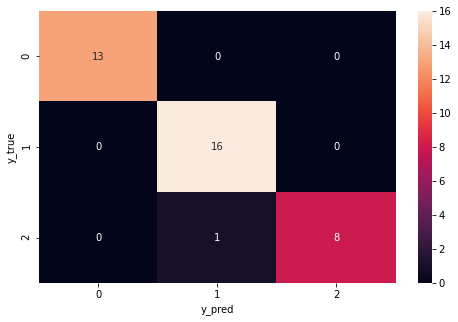

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [22]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        16
           2       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



# Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


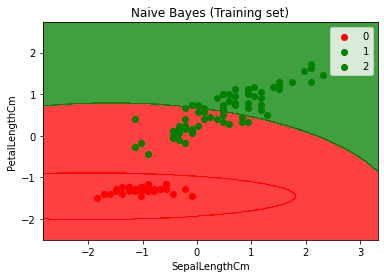

In [60]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


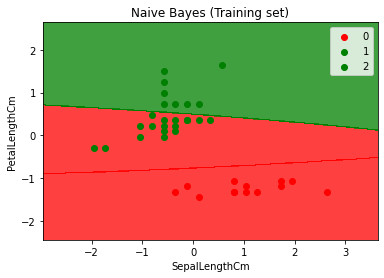

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()